In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

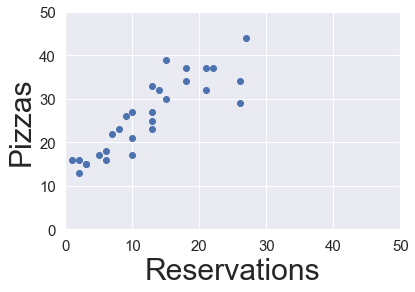

In [17]:
sns.set()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
X, Y = np.loadtxt('/Users/thomasshorney/studious-guacamole/code/02_first/pizza.txt', skiprows=1, unpack=True)
plt.plot(X, Y, "bo")
plt.show()